In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import copy as cp

from maze_graph import *

date = date_10031_maze2
NumOfMice = "10031"
totalpath = "G:\YSY"
maze_type = 2
path = [os.path.join(totalpath,NumOfMice,"Days_aligned","maze"+str(maze_type),"rate_map_all_"+date[i]+".pkl") for i in range(len(date))]

IncorrectPath = IncorrectPath_maze_1 if maze_type == 1 else IncorrectPath_maze_2

f = []
for i in range(len(date)):
    with open(path[i], 'rb') as handle:
        data = pickle.load(handle)
    f.append(data)

# Clear NaN in rate_map
def Clear_NaN(rate_map):
    for k in range(144):
        if mt.isnan(rate_map[k]):
            rate_map[k] = 0.0
    return rate_map

for j in range(len(date)):
    rate_map_all = f[j][2]
    for i in range(len(rate_map_all)):
        rate_map_all[i] = Clear_NaN(rate_map_all[i])

In [6]:
# sort the rate_map
def find_the_summit(rate_map):
    return np.argmax(rate_map)

# Generate the array that contains the summit firing rate of each neuron.
def Generate_Summit_Arr(rate_map_all):
    arr = np.zeros(len(rate_map_all))
    for i in range(len(rate_map_all)):
        arr[i] = find_the_summit(rate_map_all[i])
    return arr

# sort the rate_map
def partition(index_map, RecordVec, low, high): 
    i = low - 1         # 最小元素索引
    pivot = RecordVec[high]       
    for j in range(low, high): 
        # 当前元素大于或等于 pivot 
        if   RecordVec[j] > pivot:           
            i = i+1
            RecordVec[i], RecordVec[j] = RecordVec[j], RecordVec[i]
            c = cp.deepcopy(index_map[i,:])
            index_map[i, :] = cp.deepcopy(index_map[j, :])
            index_map[j, :] = cp.deepcopy(c)      
            
    RecordVec[i+1], RecordVec[high] = RecordVec[high], RecordVec[i+1]
    c = cp.deepcopy(index_map[i+1,:])
    index_map[i+1, :] = cp.deepcopy(index_map[high, :])
    index_map[high, :] = cp.deepcopy(c)
    return ( i+1 ) 
    
def quickSort(index_map, RecordVec, low, high): 
    if low < high:   
        pi = partition(index_map, RecordVec, low, high)
        quickSort(index_map, RecordVec, low, pi-1)
        quickSort(index_map, RecordVec, pi+1, high)

def sort_rate_map(rate_map_all):
    index_arr = Generate_Summit_Arr(rate_map_all)
    quickSort(rate_map_all, index_arr,0,len(rate_map_all)-1)

[3.5, 4.5, 5.5, 13.5, 15.5, 22.5, 24.5, 25.5, 28.5, 29.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5]


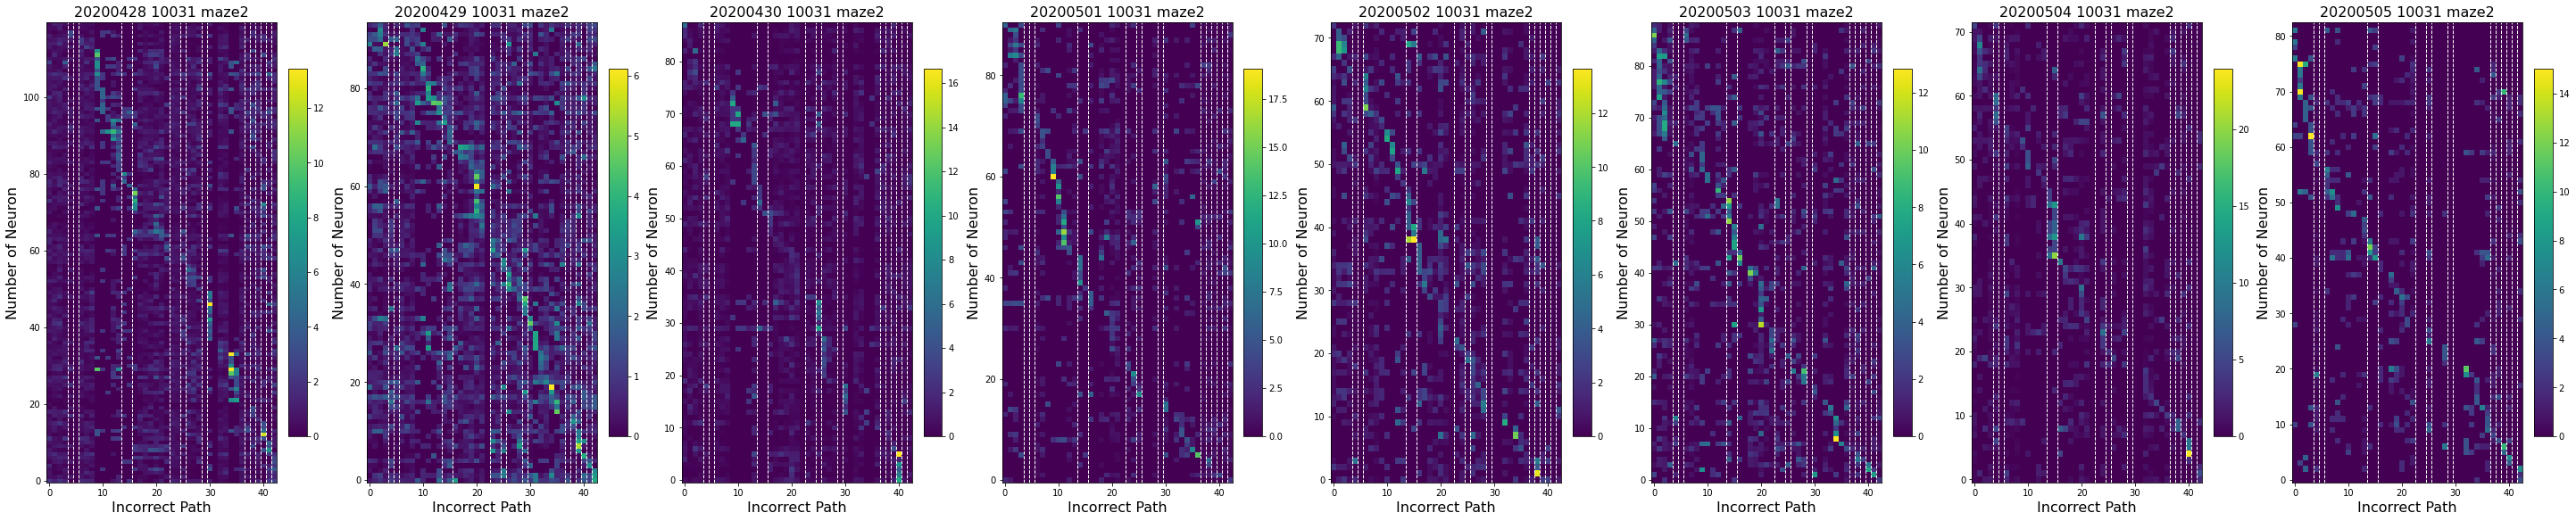

In [7]:
def Change_Index(num):
    # 将 num 转化为坐标
    if (num-1) % 12 < 6:
        x = (num-1) % 12 - 6
    else:
        x = (num-1) % 12 - 5
    if int((num-1)/12) < 6:
        y = 6 - int((num-1)/12)
    else:
        y = 5 - int((num-1)/12)

    # 坐标旋转90°，逆时针
    Rot = np.array([[0,1],[-1,0]])
    loc = np.array([x,y])
    af_loc = np.matmul(loc,Rot)
    
    # 坐标转2d下标
    if af_loc[0] > 0:
        x_new = af_loc[0] + 5
    else:
        x_new = af_loc[0] + 6
    if af_loc[1] > 0:
        y_new = 6 - af_loc[1]
    else:
        y_new = 5 - af_loc[1]
        
    # 2d下标转1d下标
    num_new = y_new * 12 + x_new + 1
    return [num_new, x_new, y_new]

#生成错误路径上的firing_rate总集合 (n_neuron * IncorrectPath维数)
def GenerateRateMap(rate_map_all, IncorrectPath):
    incor_rate_map = np.zeros([len(rate_map_all),len(IncorrectPath)])
    for j in range(len(rate_map_all)):
        for k in range(len(incor_rate_map[0])):
            incor_rate_map[j][k] = rate_map_all[j][Change_Index(IncorrectPath[k])[0]]
    return incor_rate_map

#画图
incor_rate_map_set = []

tag_site = separate_point2 if maze_type == 2 else separate_point1
print(tag_site)

def plot_rate_map(incor_rate_map,ax,title):
    ma = ax.imshow(incor_rate_map,interpolation='none',origin = "lower",alpha = 1,aspect = 'auto')
    for k in range(len(tag_site)):
        ax.axvline(x=tag_site[k], color = 'white',linewidth = 1, ls = '--')
    ax.set_title(title, fontsize = 16)
    ax.set_ylabel("Number of Neuron", fontsize = 16)
    ax.set_xlabel("Incorrect Path", fontsize = 16)
    fig.colorbar(ma,ax = ax, fraction = 0.08)


fig, axs = plt.subplots(1,len(date),constrained_layout=True, figsize=(5*len(date),8))
for k in range(len(date)):
    ax = axs[k]
    incor_rate_map = GenerateRateMap(f[k][2], IncorrectPath)
    sort_rate_map(incor_rate_map)
    incor_rate_map_set.append(incor_rate_map)
    plot_rate_map(incor_rate_map,ax,date[k]+" "+NumOfMice+" maze"+str(maze_type))

fig.savefig(os.path.join(totalpath,NumOfMice,"IncorrectPath_ratemap.png"))
fig.savefig(os.path.join(totalpath,NumOfMice,"IncorrectPath_ratemap.pdf"))